########### covA_E ############
          x         y
x  2.871903  0.676646
y  0.676646  3.293258
########### covB_E ############
          x         y
x  3.727472 -0.386011
y -0.386011  3.685659
[[9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 3.83439463e-05
  3.02053457e-05 2.37751338e-05]
 [9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 3.54176766e-05
  2.79001668e-05 2.19606781e-05]
 [9.99999999e-01 9.99999999e-01 9.99999999e-01 ... 3.27041476e-05
  2.57625778e-05 2.02781375e-05]
 ...
 [3.32147582e-01 3.14572886e-01 2.97346838e-01 ... 1.04426046e-14
  8.22606813e-15 6.47483445e-15]
 [3.01137451e-01 2.84504586e-01 2.68280614e-01 ... 9.04755529e-15
  7.12713053e-15 5.60984781e-15]
 [2.71780054e-01 2.56174321e-01 2.41021680e-01 ... 7.83633971e-15
  6.17300632e-15 4.85884549e-15]]
           x         y
0  -2.046671 -1.138497
1  -5.390173 -4.348614
2  -4.353240 -1.422210
3  -2.408495 -5.050299
4  -2.310926 -1.883893
..       ...       ...
65  1.288800  3.742165
66  1.164335  6.9835

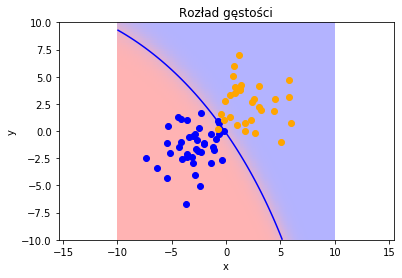

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import math
from matplotlib import colors
from sklearn.naive_bayes import GaussianNB
#import statistics as stat

meanA = np.array([-3, -1])
meanB = np.array([2, 2])
cov = np.array([[4, 0], [0, 4]])
n_A = 40
n_B = 30
n = n_A + n_B
Pi_A = n_A/n
Pi_B = n_B/n

classA = np.random.multivariate_normal(meanA, cov, n_A)
classB = np.random.multivariate_normal(meanB, cov, n_B)

classA = pd.DataFrame(classA, columns=["x","y"])           
classB = pd.DataFrame(classB, columns=["x","y"])
classA['class'] = 1
classB['class'] = 2
data = pd.concat([classA, classB], ignore_index = True)



#print(classA)

meanA_E = np.array([np.mean(classA['x']), np.mean(classA['y'])])
meanB_E = np.array([np.mean(classB['x']), np.mean(classB['y'])])
covA_E = classA.cov().loc['x':'y','x':'y']
covB_E = classB.cov().loc['x':'y','x':'y']
print("########### covA_E ############")
print(covA_E)
print("########### covB_E ############")
print(covB_E)

xp = np.linspace(-10, 10, 201)
yp = np.linspace(-10, 10, 201)
#print(xp)

#print(norm.pdf(xp, meanA_E[0], math.sqrt(covA_E[0, 0])))
#print(norm.pdf(yp, meanA_E[1], math.sqrt(covA_E[1, 1])).T)

#def bayes_P(X, Y, mA, mB, SA, SB, Pi_A, Pi_B):     # zwraca p(1|x)
#    return (Pi_A*norm.pdf(X, mA[0], math.sqrt(SA[0][0])) * norm.pdf(Y, mA[1], math.sqrt(SA[1][1]))) / ((Pi_A*norm.pdf(X, mA[0], math.sqrt(SA[0][0])) * norm.pdf(Y, mA[1], math.sqrt(SA[1][1]))) + (Pi_B*norm.pdf(X, mB[0], math.sqrt(SB[0][0])) * norm.pdf(Y, mB[1], math.sqrt(SB[1][1]))))

def bayes_P(X,Y, m1, m2, cov_1, cov_2, pi1, pi2):
    top = pi1*multivariate_normal.pdf(X, m1[0],cov_1.iloc[0,0])*multivariate_normal.pdf(Y, m1[1],cov_1.iloc[1,1])
    bottomX1 = pi1*multivariate_normal.pdf(X, m1[0],cov_1.iloc[0,0])*multivariate_normal.pdf(Y, m1[1],cov_1.iloc[1,1])
    bottomX2 = pi1*multivariate_normal.pdf(X, m2[0],cov_2.iloc[0,0])*multivariate_normal.pdf(Y, m2[1],cov_2.iloc[1,1])
    return (top) / (bottomX1 + bottomX2)

#print(bayes_P(xp, yp, meanA_E, meanB_E, covA_E, covB_E, Pi_A, Pi_B))


def expand_grid(x,y): # funkcja do rozciągnięcia siatki punktów
    gr = np.zeros((2,len(x)*len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            gr[0,i*len(xp)+j] = xp[i]
            gr[1,i*len(xp)+j] = yp[j]
    return gr

def matrix(x, rows): # funkcja do tworzenia macierzy z wektora, bo tworzenie macierzy nie działa
    Z = np.zeros((rows,rows))
    for i in range(rows):
        for j in range(rows):
            Z[i,j] = x[i*rows + j]    
    return Z


gr = expand_grid(xp,yp)

Z1 = bayes_P(gr[0], gr[1], meanA_E, meanB_E, covA_E, covB_E, Pi_A, Pi_B)
Z1 = Z1.reshape(len(xp),len(yp)).T

print(Z1)


fig, ax = plt.subplots(1,1)

ax.set(xlabel='x', ylabel='y')
ax.set_title('Rozład gęstości')
ax.label_outer()
ax.contour(xp,yp,Z1,colors='blue', levels=1)
ax.scatter(classA['x'], classA['y'], c='blue', label='klasa 1')
ax.scatter(classB['x'], classB['y'], c='orange', label='klasa 2')
ax.axis('equal')

cmap = colors.LinearSegmentedColormap('red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
                                     )
plt.cm.register_cmap(cmap=cmap)
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
NB = GaussianNB()

print(data.loc[:,'x':'y'])

NB.fit(X=data.iloc[:, 0:2],y=data['class'])
Z = NB.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), zorder=0)
plt.show()